In [18]:
import matplotlib.pyplot as plt
import pandas
import numpy as np

In [15]:
Hg_sp2 = np.asarray(pandas.read_csv('Hg2nd.csv',skipinitialspace=True))

In [19]:
Hg_sp2 = np.asarray(Hg_sp2)

[[2.20000000e-04 9.99993960e-01]
 [3.20000000e-04 9.99993960e-01]
 [4.20000000e-04 9.99993960e-01]
 ...
 [1.70659968e+02 9.74900000e-05]
 [1.70660068e+02 9.75200000e-05]
 [1.70660168e+02 9.75400000e-05]]


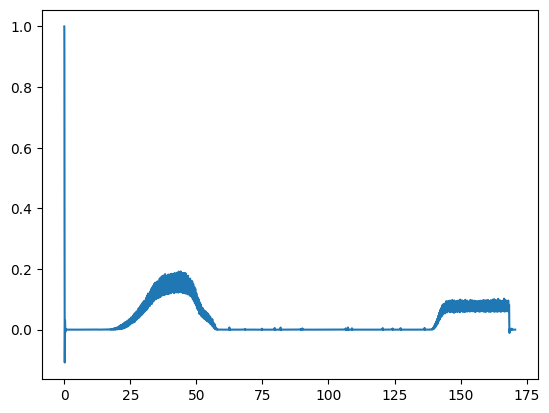

In [20]:
plt.plot(Hg_sp2[:,0],Hg_sp2[:,1])

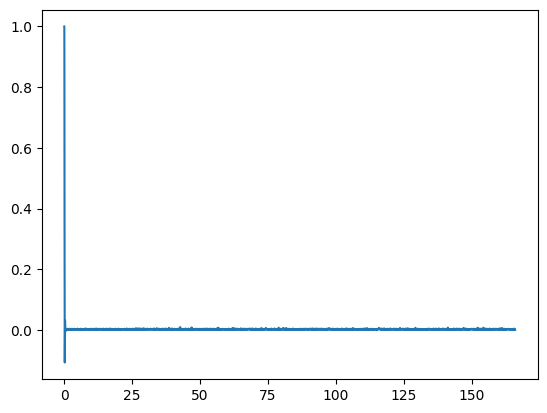

In [21]:
Hg_sp3 = np.asarray(pandas.read_csv('Hg3rd.csv',skipinitialspace=True))
plt.plot(Hg_sp3[:,0],Hg_sp3[:,1])

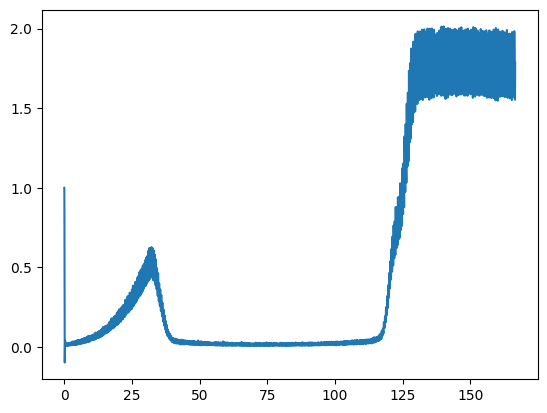

In [22]:
Hg_sp1 = np.asarray(pandas.read_csv('Hg1st.csv',skipinitialspace=True))
plt.plot(Hg_sp1[:,0],Hg_sp1[:,1])

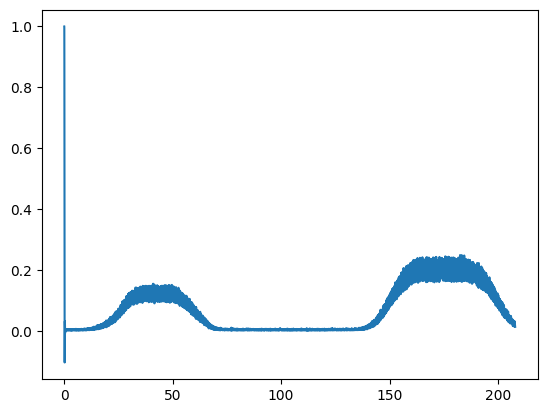

In [23]:
Hg_sp4 = np.asarray(pandas.read_csv('Hg4th.csv',skipinitialspace=True))
plt.plot(Hg_sp4[:,0],Hg_sp4[:,1])

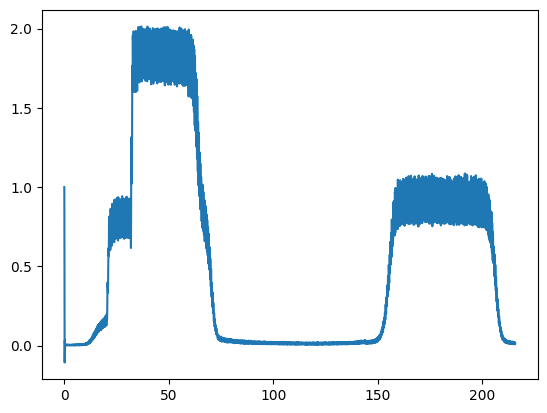

In [24]:
Hg_sp5 = np.asarray(pandas.read_csv('Hg5th.csv',skipinitialspace=True))
plt.plot(Hg_sp5[:,0],Hg_sp5[:,1])

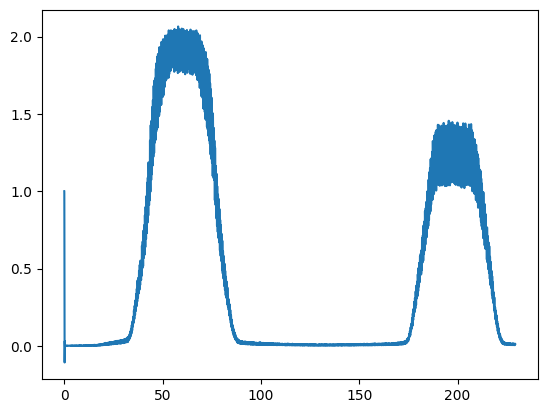

In [25]:
Hg_sp6 = np.asarray(pandas.read_csv('Hg6th.csv',skipinitialspace=True))
plt.plot(Hg_sp6[:,0],Hg_sp6[:,1])